In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
import mlfinlab as fl

import itertools as it 

from mlfinlab.filters.filters import cusum_filter
from mlfinlab.labeling.labeling import add_vertical_barrier, get_events, get_bins, drop_labels
from mlfinlab.util.utils import get_daily_vol

from plotting import *

### 3.2 From Exercise 1, use Snippet 3.8 to drop rare labels.

C:\Python37\lib\site-packages\mlfinlab\labeling\labeling.py:117: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate-loc-reindex-listlike
  target = target.loc[t_events]
2019-07-29 23:24:29.703330 100.0% apply_pt_sl_on_t1 done after 0.04 minutes. Remaining 0.0 minutes..


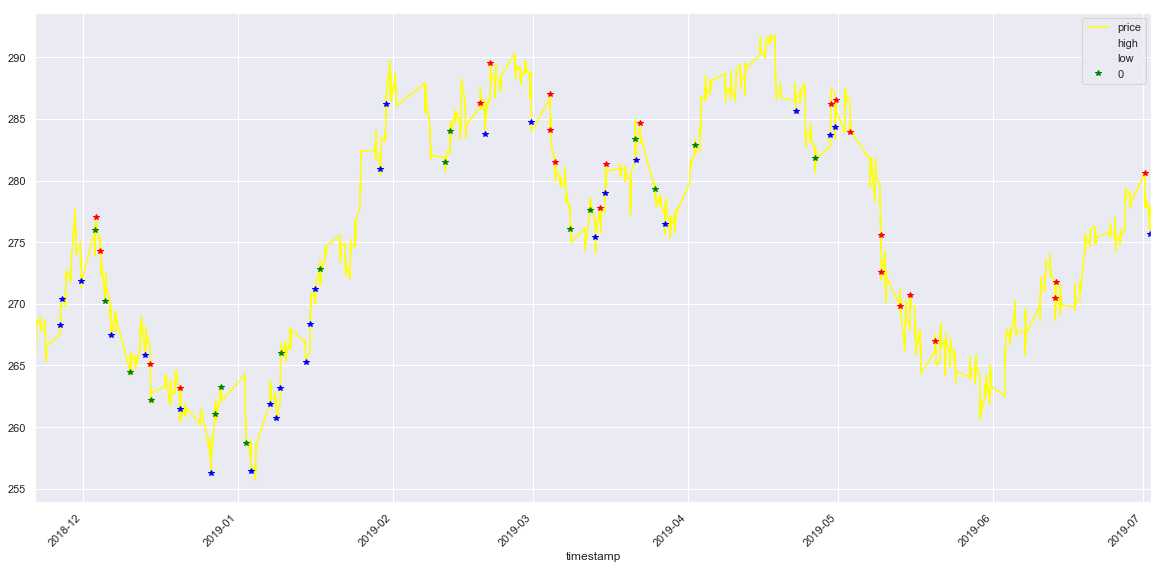

In [17]:
df = pd.read_csv('dollar_D_15.csv',index_col='timestamp')
df.index = pd.to_datetime(df.index)
data = df.price
span = 20
threshold = 0.01

daily_vol = get_daily_vol(close=data, lookback=span)
cusum_events = cusum_filter(data, threshold=threshold)
vertical_barriers = add_vertical_barrier(t_events=cusum_events, close=data, num_days=1)

# No meta-labeling
triple_barrier_events = get_events(close=data,
                               t_events=cusum_events,
                               pt_sl=[1, 1],
                               target=daily_vol,
                               min_ret=0.005,
                               num_threads=3,
                               vertical_barrier_times=vertical_barriers,
                               side_prediction=None)
triple_labels = get_bins(triple_barrier_events, data)

%matplotlib inline

figsize=(20,10)

df_event = df[df.index.isin(triple_labels.index)]
df_event.columns=['event']

ax= df.plot(
    style='-',
    color='yellow',
    use_index =True,
    subplots=False,
    sharex =True,
    rot =45,
    figsize=figsize,
)

triple_labels.head()

p1 = triple_labels.loc[triple_labels['bin'] == 1]
m1 = triple_labels.loc[triple_labels['bin'] == -1]
z0 = triple_labels.loc[triple_labels['bin'] == 0]

df_p1 = df[df.index.isin(p1.index)]
df_p1.columns=['high']
df_m1 = df[df.index.isin(m1.index)]
df_m1.columns=['low']
df_z0 = df[df.index.isin(z0.index)]
df_z0.columns=['0']

plot_star(df_p1,color='blue',ax=ax)
plot_star(df_m1,color='red',ax=ax)
plot_star(df_z0,color='green',ax=ax)

### 3.2 From exercise 1, use Snippet 3.8 to drop rare labels.

C:\Python37\lib\site-packages\mlfinlab\labeling\labeling.py:117: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate-loc-reindex-listlike
  target = target.loc[t_events]
2019-07-29 21:51:25.474806 100.0% apply_pt_sl_on_t1 done after 0.04 minutes. Remaining 0.0 minutes..


dropped label:  0 0.25757575757575757


C:\Python37\lib\site-packages\mlfinlab\labeling\labeling.py:263: FutureWarning: 
The current behaviour of 'Series.argmin' is deprecated, use 'idxmin'
instead.
The behavior of 'argmin' will be corrected to return the positional
minimum in the future. For now, use 'series.values.argmin' or
'np.argmin(np.array(values))' to get the position of the minimum
row.
  print('dropped label: ', df0.argmin(), df0.min())
C:\Python37\lib\site-packages\mlfinlab\labeling\labeling.py:264: FutureWarning: 
The current behaviour of 'Series.argmin' is deprecated, use 'idxmin'
instead.
The behavior of 'argmin' will be corrected to return the positional
minimum in the future. For now, use 'series.values.argmin' or
'np.argmin(np.array(values))' to get the position of the minimum
row.
  events = events[events['bin'] != df0.argmin()]


,ret,trgt,bin
2018-11-26 09:05:00,0.006337,0.005434,1
2018-11-26 15:34:00,0.006288,0.006055,1
2018-11-30 14:51:00,0.015266,0.005685,1
2018-12-03 11:15:00,-0.009747,0.009635,-1
2018-12-04 09:48:00,-0.014947,0.009480,-1


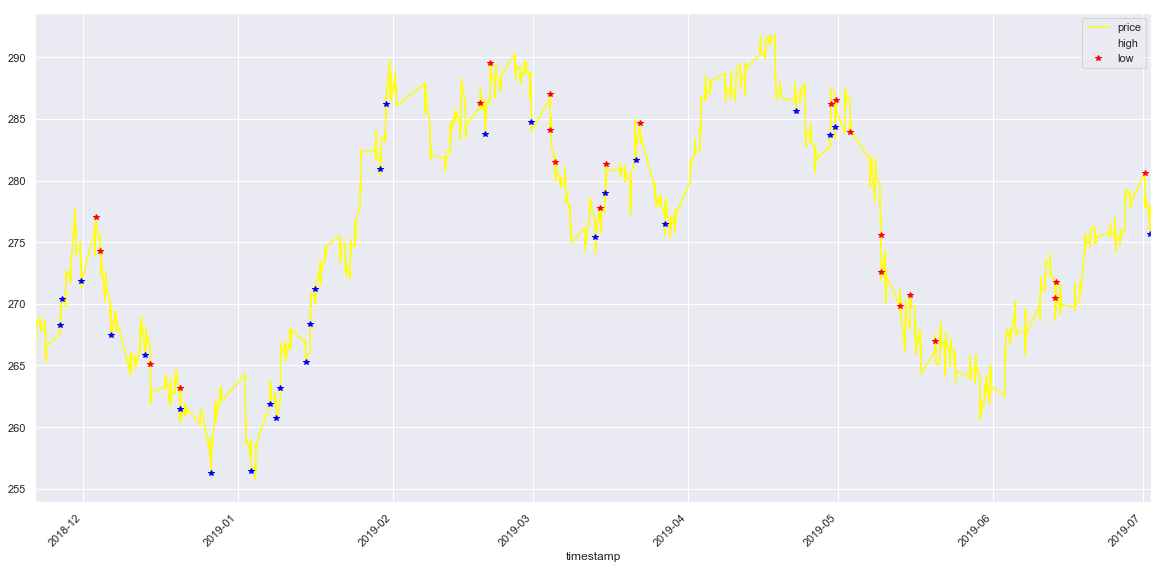

<Figure size 432x288 with 0 Axes>

In [15]:
### Set-Up
df = pd.read_csv('dollar_D_15.csv',index_col='timestamp')
df.index = pd.to_datetime(df.index)
data = df.price
span = 20
threshold = 0.01
### Process
triple_barrier_events = get_events(close=data,
                               t_events=cusum_events,
                               pt_sl=[1, 1],
                               target=daily_vol,
                               min_ret=0.005,
                               num_threads=3,
                               vertical_barrier_times=vertical_barriers,
                               side_prediction=None)
triple_labels = get_bins(triple_barrier_events, data)
new_labels = drop_labels(events=triple_labels, min_pct=0.30)
display(new_labels.head())
### Display
%matplotlib inline

figsize=(20,10)

df_event = df[df.index.isin(new_labels.index)]
df_event.columns=['event']

ax= df.plot(
    style='-',
    color='yellow',
    use_index =True,
    subplots=False,
    sharex =True,
    rot =45,
    figsize=figsize,
)

triple_labels.head()

p1 = new_labels.loc[new_labels['bin'] == 1]
m1 = new_labels.loc[new_labels['bin'] == -1]
z0 = new_labels.loc[new_labels['bin'] == 0]
plt.figure()
df_p1 = df[df.index.isin(p1.index)]
df_p1.columns=['high']
df_m1 = df[df.index.isin(m1.index)]
df_m1.columns=['low']
df_z0 = df[df.index.isin(z0.index)]
df_z0.columns=['0']

plot_star(df_p1,color='blue',ax=ax)
plot_star(df_m1,color='red',ax=ax)
#plot_star(df_z0,color='green',ax=ax)

### 3.4 Develop a trend-following strategy based on a popular technical analysis statistic(e.g., crossing moving averages). For each observation, the model suggests a side,but not a size of the bet.

#### (a) Derive meta-labels for ptSl=[1,2] and t1 where numDays=1. Use as trgt the daily standard deviation as computed by Snippet 3.1.

#### (b) Train a random forest to decide whether to trade or not. Note: The decision is whether to trade or not, {0,1}, since the underlying model (the crossing moving average) has decided the side, {−1,1}.

칼만 필터?

### 3.5 Develop a mean-reverting strategy based on Bollinger bands. For each observation, the model suggests a side, but not a size of the bet.

+ mean-reverting?